In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import minimize
import math
from multiprocessing import Pool

Leemos los datos de los resultados del análisis

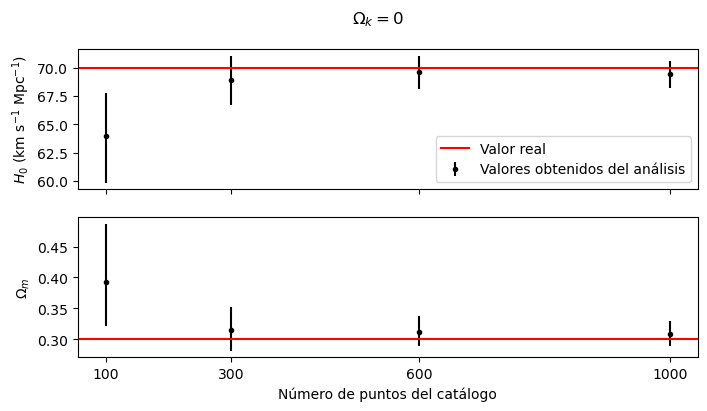

In [9]:
# Parámetros del modelo (Para pillar el nombre de los datos)
Omega_r0 = 0.0
Omega_m0 = 0.30
Omega_l0 = 0.70
h0 = 70 # km / s * Mpc

# P = 100
Resultados_100 = np.loadtxt('Resultados_P-' + str(100) + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.csv', delimiter = ',')
Resultados_100_H0 = Resultados_100[0, :]
Resultados_100_OM = Resultados_100[1, :]


Valor_100_H0 = Resultados_100_H0[0]
Error_100_H0 = Resultados_100_H0[1:3]
Valor_100_OM = Resultados_100_OM[0]
Error_100_OM = Resultados_100_OM[1:3]


# P = 300
Resultados_300 = np.loadtxt('Resultados_P-' + str(300) + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.csv', delimiter = ',')
Resultados_300_H0 = Resultados_300[0, :]
Resultados_300_OM = Resultados_300[1, :]

Valor_300_H0 = Resultados_300_H0[0]
Error_300_H0 = Resultados_300_H0[1:3]
Valor_300_OM = Resultados_300_OM[0]
Error_300_OM = Resultados_300_OM[1:3]

# P = 600
Resultados_600 = np.loadtxt('Resultados_P-' + str(600) + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.csv', delimiter = ',')
Resultados_600_H0 = Resultados_600[0, :]
Resultados_600_OM = Resultados_600[1, :]

Valor_600_H0 = Resultados_600_H0[0]
Error_600_H0 = Resultados_600_H0[1:3]
Valor_600_OM = Resultados_600_OM[0]
Error_600_OM = Resultados_600_OM[1:3]

# P = 1000
Resultados_1000 = np.loadtxt('Resultados_P-' + str(1000) + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.csv', delimiter = ',')
Resultados_1000_H0 = Resultados_1000[0, :]
Resultados_1000_OM = Resultados_1000[1, :]

Valor_1000_H0 = Resultados_1000_H0[0]
Error_1000_H0 = Resultados_1000_H0[1:3]
Valor_1000_OM = Resultados_1000_OM[0]
Error_1000_OM = Resultados_1000_OM[1:3]


#Gráfico de H0
puntos = np.array([100, 300, 600, 1000])
Valores_H0 = np.array([Valor_100_H0, Valor_300_H0, Valor_600_H0, Valor_1000_H0])
Errores_H0 = np.transpose(np.array([Error_100_H0, Error_300_H0, Error_600_H0, Error_1000_H0]))
#plt.axhline(y=70, color='r', linestyle='-', label = "Valor real")
#plt.errorbar(puntos, Valores_H0, Errores_H0, fmt =  ".k", label = "Valores obtenidos del análisis")
#plt.xlabel("Número de puntos del catálogo")
#plt.ylabel("$H_0$ (km s$^{-1}$ Mpc$^{-1}$)")
#plt.xticks(puntos)
#plt.legend(loc = "lower right")
#plt.savefig('Figura_H0_P-' + str(100) + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.pdf')
#plt.savefig('Figura_H0_P-' + str(100) + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.png')
#plt.show()

#Gráfico de OM
Valores_OM = np.array([Valor_100_OM, Valor_300_OM, Valor_600_OM, Valor_1000_OM])
Errores_OM = np.transpose(np.array([Error_100_OM, Error_300_OM, Error_600_OM, Error_1000_OM]))
#plt.axhline(y=0.30, color='r', linestyle='-', label = "Valor real")
#plt.errorbar(puntos, Valores_OM, Errores_OM, fmt =  ".k", label = "Valores obtenidos del análisis")
#plt.xlabel("Número de puntos del catálogo")
#plt.ylabel("$\Omega_m$")
#plt.xticks(puntos)
#plt.legend(loc = "upper right")
#plt.savefig('Figura_OM_P-' + str(100) + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.pdf')
#plt.savefig('Figura_OM_P-' + str(100) + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.png')
#plt.show()


# Usando SubPlots
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 4), sharex=True)
fig.suptitle('$\Omega_k = 0$')

ax1.errorbar(puntos, Valores_H0, Errores_H0, fmt=".k", label="Valores obtenidos del análisis")
ax1.set_ylabel("$H_0$ (km s$^{-1}$ Mpc$^{-1}$)")
ax1.set_xticks(puntos)
ax1.axhline(y=70, color='r', linestyle='-', label = "Valor real")
ax1.legend(loc = "lower right")
#ax1.legend(loc="lower right")


ax2.errorbar(puntos, Valores_OM, Errores_OM, fmt=".k")
ax2.set_xlabel("Número de puntos del catálogo")
ax2.set_ylabel("$\Omega_m$")
ax2.set_xticks(puntos)
ax2.axhline(y=0.30, color='r', linestyle='-')
#ax2.legend(loc="upper right")

# Crear la leyenda independiente de los subplots
# leg = plt.figlegend(loc=(0.25, -0.1), ncol=2)

# Ajustar los subplots y la leyenda para evitar superposiciones
#plt.tight_layout(rect=[0, 0, 1, 0.9])
#plt.subplots_adjust(bottom=0.2)

## Shrink current axis by 20%
#box = ax1.get_position()
#ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#
## Shrink current axis by 20%
#box = ax2.get_position()
#ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#
#
## Put a legend to the right of the current axis
#ax1.legend(loc='center left', bbox_to_anchor=(1, -1))

plt.savefig('Figura_SubPlots_Flat_' + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.pdf')
plt.savefig('Figura_SubPlots_Flat_' + '_H0-' + str(h0) + '_Omega_r-' + str(Omega_r0) + '_Omega_m-' + str(Omega_m0) + '_Omega_l-' + str(Omega_l0) + '.png')


plt.show()


In [6]:
prueba = np.array([[1, 2], [3, 4]])
print(prueba.shape)

(2, 2)
